**Deep Learning programming task**

Assignment 4 : Dense Net and tf.function

Team members:

Sanjeeth Busnur Indushekar: 224133 : sanjeeth.busnur@st.ovgu.de


Aditya Dey : 230580 : aditya.dey@st.ovgu.de


Suraj Shashidhar: 230052 : suraj.shashidhar@st.ovgu.de

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models,optimizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import time

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Flatten, Dropout
from tensorflow.keras.layers import concatenate, Activation
from tensorflow.keras.optimizers import RMSprop

### Cifar10 data using tf.function

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

[4]


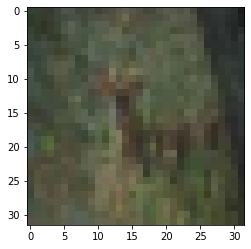

In [23]:
print(train_labels[10])
plt.imshow(train_images[10], cmap=plt.cm.binary)

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images.astype(np.float32)/255.0, train_labels.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images.shape[0]).batch(256)

test_data = tf.data.Dataset.from_tensor_slices(( test_images.astype(np.float32)/255.0, test_labels.astype(np.int32) ))

test_data = test_data.batch(256)

In [0]:
model = models.Sequential([layers.Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform",input_shape=(32,32,3)),
                          layers.BatchNormalization(),
                          layers.Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform"),
                          layers.BatchNormalization(), 
                          layers.MaxPooling2D(),
                          layers.Dropout(0.3),
                           
                          layers.Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform"),
                          layers.BatchNormalization(),
                          layers.Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform"),
                          layers.BatchNormalization(), 
                          layers.MaxPooling2D(),
                          layers.Dropout(0.4),

                          layers.Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform"),
                          layers.BatchNormalization(),
                          layers.Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform"),
                          layers.BatchNormalization(), 
                          layers.MaxPooling2D(),
                          layers.Dropout(0.5), 
                           
                          layers.Flatten(), 
                          layers.Dense(64, activation='relu'), 
                          layers.Dense(10) ])

In [0]:
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
# @tf.function
def train_step(imgs, lbls):
    with tf.GradientTape() as tape:
        logits = model(imgs)
        xent = loss_fn(lbls, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    optimizer.apply_gradients(zip(grads, varis))

    return xent, logits

In [18]:
start = time.time()
epochs=21
for epoch in range(epochs):
  tf.print("===== epoch number: {}".format(epoch))

  start_epoch = time.time()
  for step, (x_batch_train, y_batch_train) in enumerate(train_data):
    xent, logits = train_step(x_batch_train, y_batch_train)
    train_acc_metric(y_batch_train, logits)

  train_acc = train_acc_metric.result()
  tf.print('Training acc over epoch: %s' % (float(train_acc),))
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  tf.print('Validation acc: %s' % (float(val_acc),))
  end_epoch = time.time()
  tf.print("time taken for this epoch(in seconds): ",(end_epoch - start_epoch))
stop = time.time()
tf.print("total time(in second): ", (stop - start))

===== epoch number: 0
Training acc over epoch: 0.23216000199317932
Validation acc: 0.3165999948978424
time taken for this epoch(in seconds):  9.4675772190094
===== epoch number: 1
Training acc over epoch: 0.40525999665260315
Validation acc: 0.4715999960899353
time taken for this epoch(in seconds):  8.317382335662842
===== epoch number: 2
Training acc over epoch: 0.51774001121521
Validation acc: 0.5710999965667725
time taken for this epoch(in seconds):  8.367700815200806
===== epoch number: 3
Training acc over epoch: 0.5910400152206421
Validation acc: 0.6248999834060669
time taken for this epoch(in seconds):  8.313086748123169
===== epoch number: 4
Training acc over epoch: 0.651960015296936
Validation acc: 0.6299999952316284
time taken for this epoch(in seconds):  8.295811414718628
===== epoch number: 5
Training acc over epoch: 0.6941400170326233
Validation acc: 0.652999997138977
time taken for this epoch(in seconds):  8.30174732208252
===== epoch number: 6
Training acc over epoch: 0.72

In [19]:
for img_batch, lbl_batch in test_data:
    val_acc_metric(lbl_batch, model(img_batch))

val_acc_metric.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6945>

**With out tf.function**

In [28]:
start = time.time()
epochs=21
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  start_epoch = time.time()
  for step, (x_batch_train, y_batch_train) in enumerate(train_data):
    xent, logits = train_step(x_batch_train, y_batch_train)
    train_acc_metric(y_batch_train, logits)

  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))
  end_epoch = time.time()
  print("time taken for this epoch(in seconds): ",(end_epoch - start_epoch))
stop = time.time()
print("total time(in second): ", (stop - start))

===== epoch number: 0
Training acc over epoch: 0.25905999541282654
Validation acc: 0.3402999937534332
time taken for this epoch(in seconds):  9.754390001296997
===== epoch number: 1
Training acc over epoch: 0.39362001419067383
Validation acc: 0.4287000000476837
time taken for this epoch(in seconds):  9.653002977371216
===== epoch number: 2
Training acc over epoch: 0.45673999190330505
Validation acc: 0.4528999924659729
time taken for this epoch(in seconds):  9.791287422180176
===== epoch number: 3
Training acc over epoch: 0.5008400082588196
Validation acc: 0.516700029373169
time taken for this epoch(in seconds):  9.708388090133667
===== epoch number: 4
Training acc over epoch: 0.5558000206947327
Validation acc: 0.5702000260353088
time taken for this epoch(in seconds):  9.734238862991333
===== epoch number: 5
Training acc over epoch: 0.6041600108146667
Validation acc: 0.5964000225067139
time taken for this epoch(in seconds):  9.706636428833008
===== epoch number: 6
Training acc over epoc

Conclusion: with tf.function computation was faster than regular function. with tf.function it took 176.19 seconds in total for 21 epochs(approximately 8.35 seconds per epoch) where as with out tf.function it took 204.33.50 seconds. i.e approximately 9.7 seconds per epoch.

### Dense Network on cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
batch_size = 128
num_classes = 10
epochs = 250
l = 5
num_filter = 36
compression = 0.5

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
print("training samples shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)
print("test samples shape: ", x_test.shape)
print("test labels shape: ", y_test.shape)

training samples shape:  (50000, 32, 32, 3)
training labels shape:  (50000, 10)
test samples shape:  (10000, 32, 32, 3)
test labels shape:  (10000, 10)


In [0]:
input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3])

In [0]:
def dense_block(input,num_of_filters):
  global compression
  temp = input
  for _ in range(l):
    BatchNorm_BN = BatchNormalization()(temp)
    relu_BN = Activation('relu')(BatchNorm_BN)
    conv_2d_1_1_BN = Conv2D(int(num_of_filters),(1,1),padding='same',kernel_initializer='he_uniform')(relu_BN)
    BatchNorm = BatchNormalization()(conv_2d_1_1_BN)
    relu = Activation('relu')(BatchNorm)
    conv_2d_3_3 = Conv2D(int(num_of_filters),(3,3),padding='same',kernel_initializer='he_uniform')(relu)
    concat = concatenate([temp,conv_2d_3_3],axis=-1)
    temp = concat
  return temp



In [0]:
def transition_block(input,num_of_filters):
  global compression
  BatchNorm = BatchNormalization()(input)
  relu = Activation('relu')(BatchNorm)
  conv_2d_1_1 = Conv2D(int(num_of_filters*compression),(1,1),padding='same',kernel_initializer='he_uniform')(relu)
  AveragePool = AveragePooling2D(pool_size=(2, 2), strides=2)(conv_2d_1_1)
  return AveragePool

In [0]:
def output_layer(input):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AveragePooling = AveragePooling2D(pool_size=(2,2))(relu)
    conv_2d_2_2 = Conv2D(num_classes, kernel_size = (2,2))(AveragePooling)
    output = Activation('softmax')(conv_2d_2_2)
    flat = Flatten()(output)
    return flat

In [0]:
input = Input(shape=input_shape)
First_Conv2D = Conv2D(num_filter, (3,3), kernel_initializer='he_uniform' ,padding='same')(input)

First_Block = dense_block(First_Conv2D, num_filter)
First_Transition = transition_block(First_Block, num_filter)

Second_Block = dense_block(First_Transition, num_filter)
Second_Transition = transition_block(Second_Block, num_filter)

Third_Block = dense_block(Second_Transition, num_filter)
Third_Transition = transition_block(Third_Block, num_filter)

Last_Block = dense_block(Third_Transition,num_filter)
output = output_layer(Last_Block)

In [0]:
model = models.Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 36)   1008        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 36)   144         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 36)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
datagen = ImageDataGenerator(rotation_range = 15, horizontal_flip = True, width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 15)
datagen.fit(x_train)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(0.005),metrics=['accuracy'])

In [0]:
model.fit(datagen.flow(x_train, y_train, batch_size), steps_per_epoch = 3*x_train.shape[0]/batch_size, 
                    epochs = 30 ,validation_data =(x_test, y_test))

Epoch 1/30
1172/1171 [==============================] - 98s 84ms/step - loss: 1.4072 - accuracy: 0.4939 - val_loss: 2.2393 - val_accuracy: 0.4292
Epoch 2/30
1172/1171 [==============================] - 96s 82ms/step - loss: 0.9123 - accuracy: 0.6768 - val_loss: 0.9321 - val_accuracy: 0.6844
Epoch 3/30
1172/1171 [==============================] - 96s 82ms/step - loss: 0.7124 - accuracy: 0.7498 - val_loss: 1.0173 - val_accuracy: 0.6874
Epoch 4/30
1172/1171 [==============================] - 96s 82ms/step - loss: 0.6011 - accuracy: 0.7897 - val_loss: 0.9142 - val_accuracy: 0.7159
Epoch 5/30
1172/1171 [==============================] - 96s 82ms/step - loss: 0.5282 - accuracy: 0.8165 - val_loss: 0.6595 - val_accuracy: 0.7963
Epoch 6/30
1172/1171 [==============================] - 96s 82ms/step - loss: 0.4779 - accuracy: 0.8328 - val_loss: 0.6896 - val_accuracy: 0.7734
Epoch 7/30
1172/1171 [==============================] - 96s 82ms/step - loss: 0.4393 - accuracy: 0.8461 - val_loss: 0.6521 -

Conclusion: Achecived an accuracy of 89.50% with growth rate of 5, compression rate of 0.5 and leaarning rate of 0.005 with Adam Optimizier. We Made use of 4 dense blocks with data agumentation. 

### Other Experimental results

Summary: 

1. Achecived an accuracy of 87% with growth rate of 5, compression rate of 0.5 and leaarning rate of 0.005 with Adam Optimizier. We Made use of 4 dense blocks with data agumentation **with out bottle neck**.

2. **Playing with growth rate**

Summary: Earlier we saw densenets with growth rate of fixed 5. Now we will change the growth rate to 3, 7, 9 and 12 and run for 10 - 20 epochs(epochs are kept a little less as gpu availability need to be considered). As expected , increase in growth rate leads to increase in accuracy as more and more featuremaps are considered inside the dense block


growth rate = 3 | config 4: Params used = 80K, time taken to train per epoch = 80 seconds, Training accuracy = 86%, Test accuracy = 84%


growth rate = 7 | config 3: Params used = 230K, time taken to train per epoch = 100 seconds, Training accuracy = 90%, Test accuracy = 88%


growth rate = 9 | config 5: Params used = 330K, time taken to train per epoch = 120 seconds, Training accuracy = 93%, Test accuracy = 90%


growth rate = 12 | config 6: Params used = 450K, time taken to train per epoch = 150 seconds, Training accuracy = 94%, Test accuracy = 90%

3. **Playing with compression**

Summary: We have fixed growth rate to 5 and experiment with high(0.2), medium(0.5) and low compression(0.9). We recorded the accuracy , number of parameters and training time per epoch. We ran experiments for 10-20 epochs
As expected if we use more compression, the parameters would decrease and training time also decreased meagerly. But accuracy actually remained same for compression = 0.2 when compared to 0.5 which was a surprise, maybe there were more redundancy in featuremaps that could be removed without affecting overall outcome. As expected for low compression(0.9) we got 87% accuracy.


compression = 0.2 | config 7: Params used = 120K, time taken to train per epoch = 83 seconds, Training accuracy = 88%, Test accuracy = 86.5%


compression = 0.5 | config 2: Params used = 150K, time taken to train per epoch = 85 seconds, Training accuracy = 89%, Test accuracy = 87.2%


compression = 0.9 | config 8: Params used = 200K, time taken to train per epoch = 90 seconds, Training accuracy = 91%, Test accuracy = 87%

### Computational Graph

In [0]:
import tensorboard
from datetime import datetime
from keras import backend as K

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
img_rows, img_cols = 28, 28

# the data, split between train and test set

if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images.astype(np.float32)/255.0, train_labels.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images.shape[0]).batch(32)

test_data = tf.data.Dataset.from_tensor_slices(( test_images.astype(np.float32)/255.0, test_labels.astype(np.int32) ))

test_data = test_data.batch(32)

In [0]:
model = keras.Sequential([layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=input_shape),
                          layers.MaxPool2D(),
                          layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                          layers.MaxPool2D(), 
                          layers.Flatten(), 
                          layers.Dense(64, activation='relu'), 
                          layers.Dense(10) ])

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
@tf.function
def train_step(imgs, lbls):
    with tf.GradientTape() as tape:
        logits = model(imgs)
        xent = loss_fn(lbls, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    optimizer.apply_gradients(zip(grads, varis))

    return xent, logits
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

In [193]:
epochs=5
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))
  for step, (x_batch_train, y_batch_train) in enumerate(train_data):
    tf.summary.trace_on(graph=True, profiler=True)
    xent, logits = train_step(x_batch_train, y_batch_train)
    with writer.as_default():
      tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)
    train_acc_metric(y_batch_train, logits)

  train_acc = train_acc_metric.result()
  tf.print('Training acc over epoch: %s' % (float(train_acc),))
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  tf.print('Validation acc: %s' % (float(val_acc),))

===== epoch number: 0
Training acc over epoch: 0.9647833108901978
Validation acc: 0.9842000007629395
===== epoch number: 1
Training acc over epoch: 0.9840999841690063
Validation acc: 0.9869999885559082
===== epoch number: 2
Training acc over epoch: 0.988016664981842
Validation acc: 0.9854000210762024
===== epoch number: 3
Training acc over epoch: 0.9894333481788635
Validation acc: 0.9872999787330627
===== epoch number: 4
Training acc over epoch: 0.9908000230789185
Validation acc: 0.9904000163078308


In [182]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
%tensorboard --logdir logs
# tensorboard --logdir logs